In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i , city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Creat endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, reccord, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | caninde de sao francisco
Processing Record 3 of Set 1 | gediz
Processing Record 4 of Set 1 | abha
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | jyvaskyla
Processing Record 7 of Set 1 | fairbanks
Processing Record 8 of Set 1 | victor harbor
Processing Record 9 of Set 1 | praia da vitoria
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | zaranj
Processing Record 16 of Set 1 | upata
Processing Record 17 of Set 1 | pafos
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | ostrovnoy
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | fortuna
Proc

Processing Record 40 of Set 4 | louis trichardt
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | hermanus
Processing Record 43 of Set 4 | harlingen
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | shache
Processing Record 48 of Set 4 | tongliao
Processing Record 49 of Set 4 | konstantinovka
Processing Record 50 of Set 4 | wahran
City not found. Skipping...
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | galle
Processing Record 3 of Set 5 | karaton
Processing Record 4 of Set 5 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 5 of Set 5 | vasylivka
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | tamandare
Processing Record 8 of Set 5 | san patricio
Processing Record 9 of Set 5 | bayir
Processing Record 10 of Set 5 | attawapiskat
City n

Processing Record 27 of Set 8 | panguma
Processing Record 28 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 29 of Set 8 | tema
Processing Record 30 of Set 8 | nuuk
Processing Record 31 of Set 8 | toliary
City not found. Skipping...
Processing Record 32 of Set 8 | bacuit
City not found. Skipping...
Processing Record 33 of Set 8 | smolenka
Processing Record 34 of Set 8 | ridgecrest
Processing Record 35 of Set 8 | saint george
Processing Record 36 of Set 8 | tiksi
Processing Record 37 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | saint-fabien
City not found. Skipping...
Processing Record 40 of Set 8 | ahipara
Processing Record 41 of Set 8 | akdepe
Processing Record 42 of Set 8 | salinopolis
Processing Record 43 of Set 8 | wyndham
Processing Record 44 of Set 8 | igarka
Processing Record 45 of Set 8 | escanaba
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | acapulco
Pro

Processing Record 17 of Set 12 | biltine
Processing Record 18 of Set 12 | tuy hoa
Processing Record 19 of Set 12 | mandan
Processing Record 20 of Set 12 | margate
Processing Record 21 of Set 12 | black river
Processing Record 22 of Set 12 | sao francisco do sul
Processing Record 23 of Set 12 | sola
Processing Record 24 of Set 12 | lolua
City not found. Skipping...
Processing Record 25 of Set 12 | havre
Processing Record 26 of Set 12 | utiroa
City not found. Skipping...
Processing Record 27 of Set 12 | dunda
Processing Record 28 of Set 12 | talaya
Processing Record 29 of Set 12 | cabedelo
Processing Record 30 of Set 12 | clyde river
Processing Record 31 of Set 12 | sanmenxia
Processing Record 32 of Set 12 | longlac
City not found. Skipping...
Processing Record 33 of Set 12 | waingapu
Processing Record 34 of Set 12 | port hawkesbury
Processing Record 35 of Set 12 | presidente bernardes
Processing Record 36 of Set 12 | erenhot
Processing Record 37 of Set 12 | soller
Processing Record 38 o

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.67,72,22,12.01,PF,2021-12-31 19:59:14
1,Caninde De Sao Francisco,-9.6600,-37.7894,92.59,33,84,6.42,BR,2021-12-31 19:57:51
2,Gediz,39.0417,29.4100,41.99,81,24,4.25,TR,2021-12-31 19:59:15
3,Abha,18.2164,42.5053,53.42,82,0,0.00,SA,2021-12-31 19:59:15
4,Bluff,-46.6000,168.3333,57.79,82,93,9.91,NZ,2021-12-31 19:59:15
5,Jyvaskyla,62.2415,25.7209,25.14,85,90,8.05,FI,2021-12-31 19:59:16
6,Fairbanks,64.8378,-147.7164,-3.66,71,100,3.38,US,2021-12-31 19:59:16
7,Victor Harbor,-35.5667,138.6167,76.80,69,100,0.89,AU,2021-12-31 19:59:16
8,Praia Da Vitoria,38.7333,-27.0667,59.76,82,40,13.09,PT,2021-12-31 19:59:16
9,Hobart,-42.8794,147.3294,62.28,87,20,4.61,AU,2021-12-31 19:59:17


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-12-31 19:59:14,-23.1203,-134.9692,77.67,72,22,12.01
1,Caninde De Sao Francisco,BR,2021-12-31 19:57:51,-9.6600,-37.7894,92.59,33,84,6.42
2,Gediz,TR,2021-12-31 19:59:15,39.0417,29.4100,41.99,81,24,4.25
3,Abha,SA,2021-12-31 19:59:15,18.2164,42.5053,53.42,82,0,0.00
4,Bluff,NZ,2021-12-31 19:59:15,-46.6000,168.3333,57.79,82,93,9.91
5,Jyvaskyla,FI,2021-12-31 19:59:16,62.2415,25.7209,25.14,85,90,8.05
6,Fairbanks,US,2021-12-31 19:59:16,64.8378,-147.7164,-3.66,71,100,3.38
7,Victor Harbor,AU,2021-12-31 19:59:16,-35.5667,138.6167,76.80,69,100,0.89
8,Praia Da Vitoria,PT,2021-12-31 19:59:16,38.7333,-27.0667,59.76,82,40,13.09
9,Hobart,AU,2021-12-31 19:59:17,-42.8794,147.3294,62.28,87,20,4.61


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

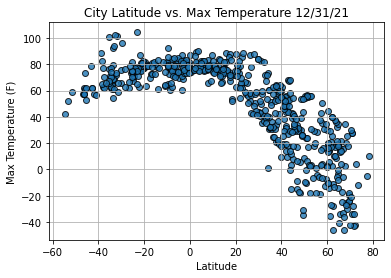

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

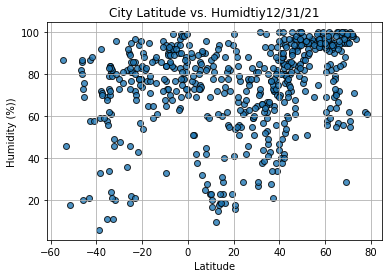

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidtiy"+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

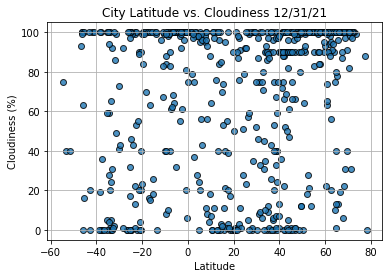

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

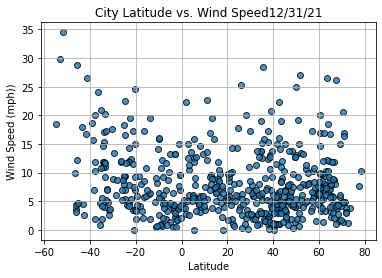

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                       Zaranj
Country                        AF
Date          2021-12-31 19:59:18
Lat                       30.9667
Lng                       61.8833
Max Temp                    49.96
Humidity                       85
Cloudiness                      8
Wind Speed                   7.81
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
552     True
553     True
554    False
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Gediz,TR,2021-12-31 19:59:15,39.0417,29.4100,41.99,81,24,4.25
3,Abha,SA,2021-12-31 19:59:15,18.2164,42.5053,53.42,82,0,0.00
5,Jyvaskyla,FI,2021-12-31 19:59:16,62.2415,25.7209,25.14,85,90,8.05
6,Fairbanks,US,2021-12-31 19:59:16,64.8378,-147.7164,-3.66,71,100,3.38
8,Praia Da Vitoria,PT,2021-12-31 19:59:16,38.7333,-27.0667,59.76,82,40,13.09


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

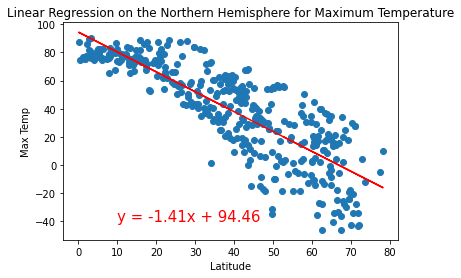

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-40))

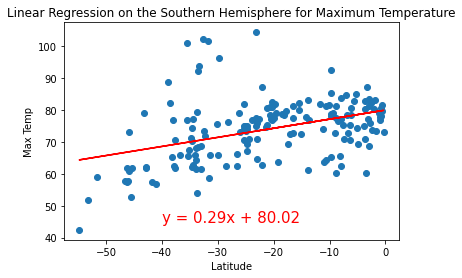

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-40,45))

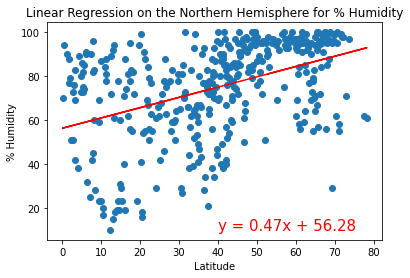

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

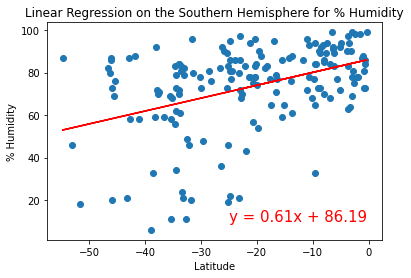

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-25,10))

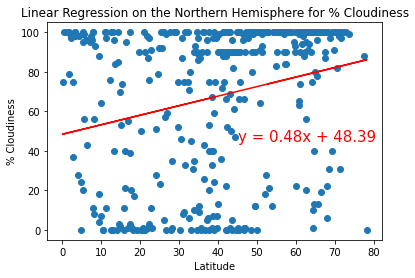

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,45))

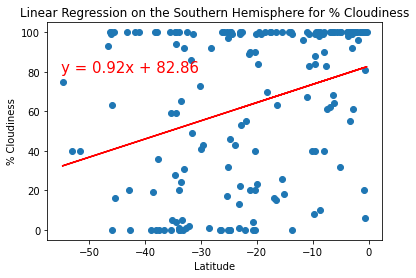

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,80))

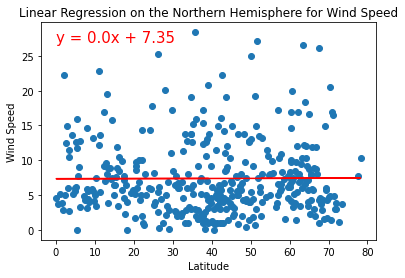

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,27))

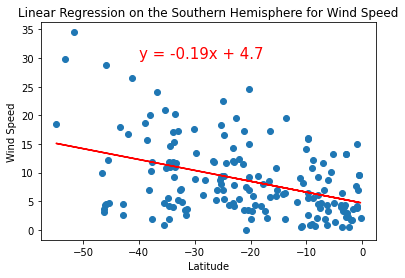

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,30))